# Основные концепции Machine Learning. Домашняя работа

In [36]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [38]:
### Здесь требуется загрузить датасет phones.csv ###

In [39]:
phones = pd.read_csv("phones.csv")

In [40]:
phones.head(10)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [41]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

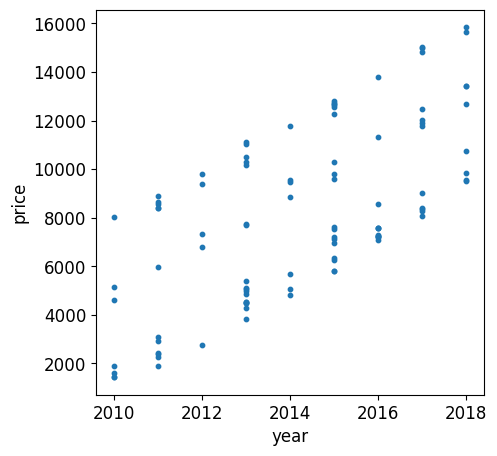

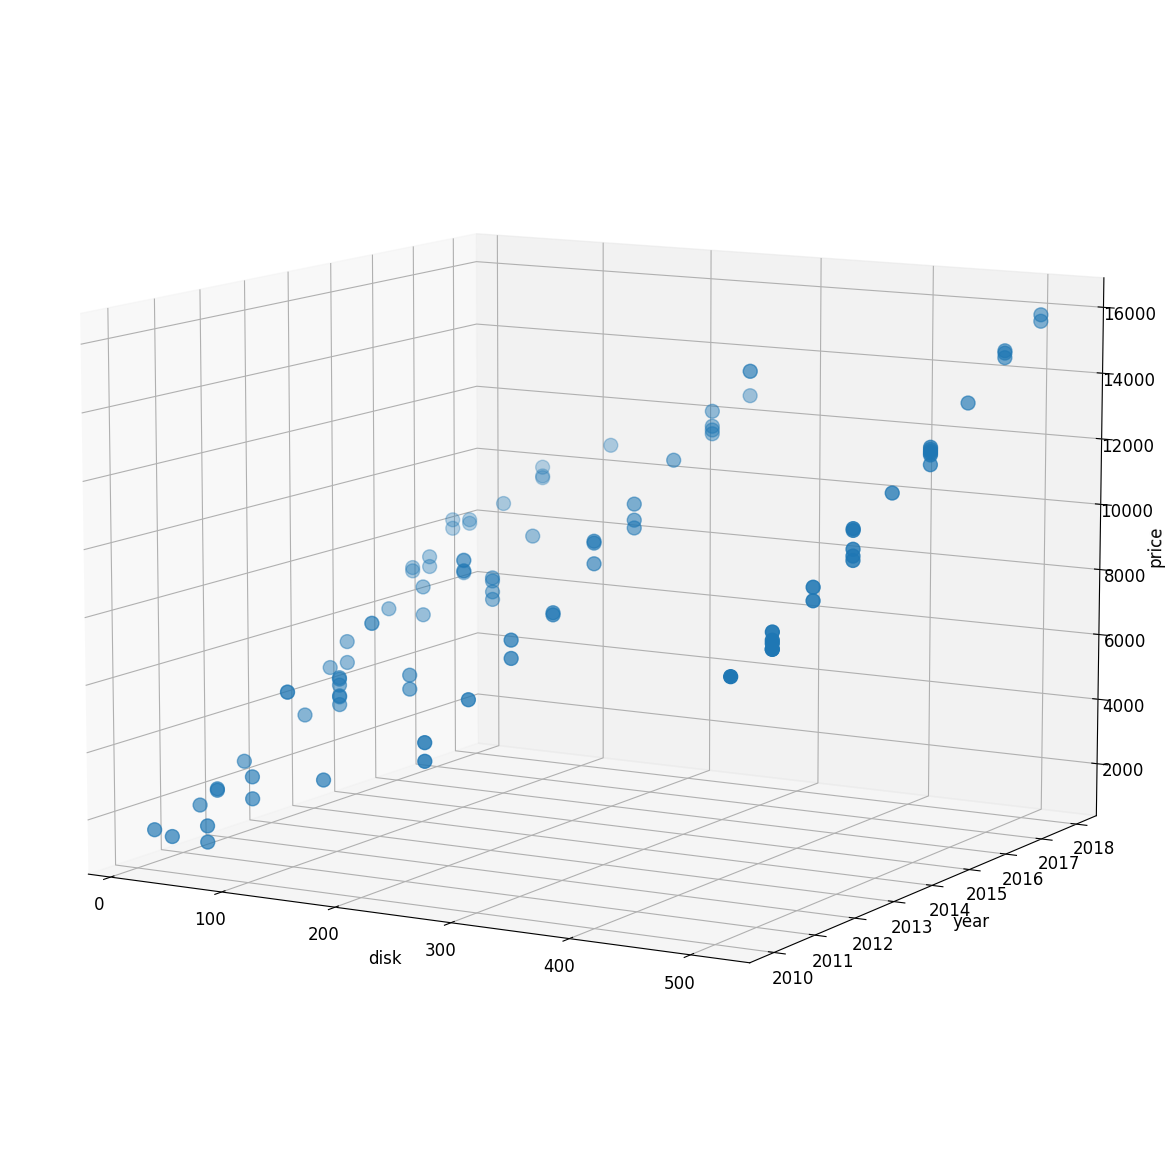

In [82]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции
matplotlib.rc("font", size=12) # шрифт подписей графиков

#2D
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=10)
ax.set_xlabel("year")
ax.set_ylabel("price")

plt.show()

# 3D
fig = plt.figure(figsize=(15, 15)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

# отображаем картинку
ax.elev = 10
plt.show()

Задание 1: обучить модель регрессии

In [43]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
X = phones[["year"]]
y = phones["price"]

reg = LinearRegression().fit(X, y)

In [44]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [45]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены телефона
def reg_prediction(dim_1):
    return a + b * dim_1

print(reg_prediction(X.year[0]))
print(reg.predict(X[0:1])[0])

9838.83475733595
9838.83475733595


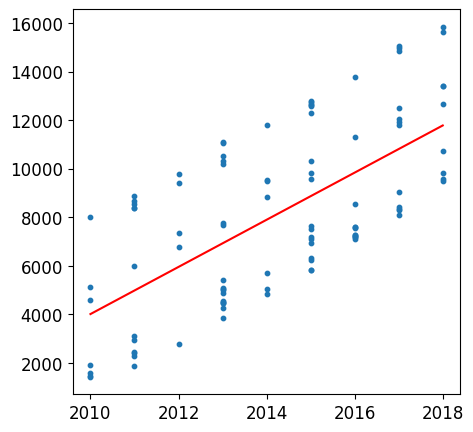

In [46]:
fig = plt.figure(figsize=(5, 5)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["year"], phones["price"], s=10)
# помещаем предсказания
ax.plot([X.year.min(), X.year.max()], [reg_prediction(X.year.min()), reg_prediction(X.year.max())], c="red")

# отображаем картинку
plt.show()

Задание 2: обучить модель классификации

In [71]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

X = phones[["year", "disk"]]
y = phones["os"]

In [72]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [73]:
cl = DecisionTreeClassifier().fit(X, y)

# выведем информацию для интерпретации построенной модели
print(export_text(cl))

|--- feature_1 <= 192.00
|   |--- class: Android
|--- feature_1 >  192.00
|   |--- class: iOS



In [81]:
# проведем классификацию
cl.predict(X[7:8])[0], y[7]

('Android', 'Android')

Задание 3: обучить модель кластеризации

In [51]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
from sklearn.cluster import KMeans #k-средних

X = phones[["year", "disk"]]

In [52]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [53]:
# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [54]:
# смотрим центры кластеров
[c1, c2, c3] = clust.cluster_centers_

In [55]:
clust.cluster_centers_

array([[2013.88461538,  512.        ],
       [2014.24528302,   57.35849057],
       [2014.57142857,  256.        ]])

In [56]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"basic": "o", "medium": "v", "luxury": "*"}
for d1, d2, l in zip(phones.year, phones.disk, phones.price):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)

# отображаем картинку
plt.show()

<Figure size 1000x1000 with 0 Axes>

<class 'KeyError'>: 7256